# ИТОГОВЫЙ ПРОЕКТ (Python для ДА)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1X51IKNrczRKyJ_tY_P3X_LMJEqAzbmZ_

Downloading...
From: https://drive.google.com/uc?id=1X51IKNrczRKyJ_tY_P3X_LMJEqAzbmZ_
To: /content/products.xlsx
100% 1.31M/1.31M [00:00<00:00, 103MB/s]


In [ ]:
!gdown 1MxOe6bfaLkHN0S1iB5IqmfxGBg96yZrm

Downloading...
From: https://drive.google.com/uc?id=1MxOe6bfaLkHN0S1iB5IqmfxGBg96yZrm
To: /content/orders.xlsx
100% 162k/162k [00:00<00:00, 63.3MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

## Небольшое EDA

In [ ]:
products = pd.read_excel('/content/products.xlsx')
products.head(1)

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  40152 non-null  int64 
 1   level1      40152 non-null  object
 2   level2      40152 non-null  object
 3   name        39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
len(products['product_id'].unique())

40152

In [ ]:
orders = pd.read_excel('/content/orders.xlsx')
orders.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 181.9 KB


## Самая ходовая товарная группа

In [ ]:
df = orders.merge(products, on='product_id', how='left')
df.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
 7   level1         3018 non-null   object        
 8   level2         3018 non-null   object        
 9   name           3010 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 259.7+ KB


In [ ]:
df_products_group = df.groupby('level1').agg(sum_quantity=('quantity', 'sum')).reset_index()
df_products_group.sort_values(by='sum_quantity', ascending=False).head()

,level1,sum_quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239


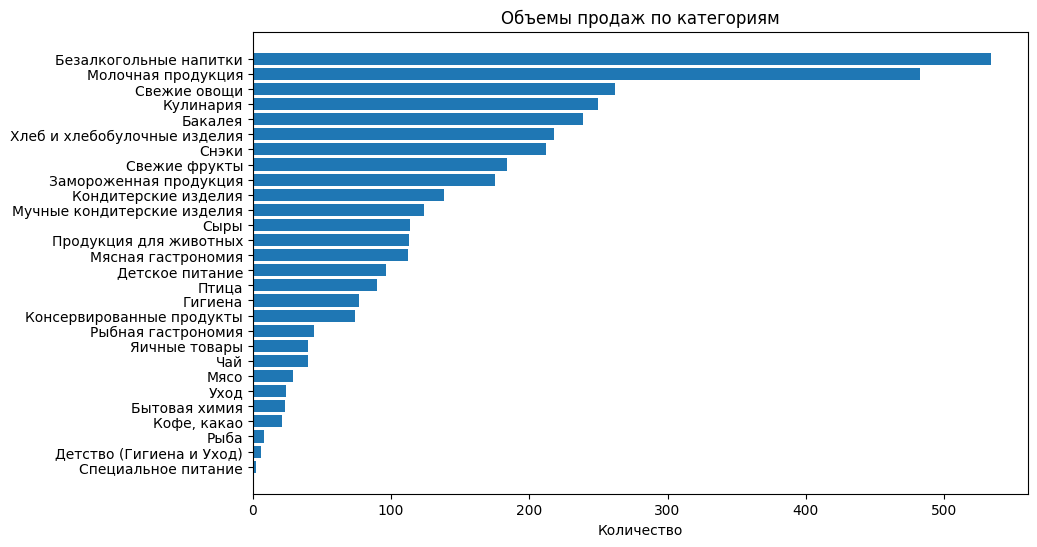

In [ ]:
plt.figure(figsize=(10, 6))
df_sorted = df_products_group.sort_values(by='sum_quantity')
plt.barh(df_sorted['level1'], df_sorted['sum_quantity'])
plt.xlabel('Количество')
plt.title('Объемы продаж по категориям');

## Распределение продаж по подкатегориям

In [ ]:
df_products_subgroups = df.groupby(['level1', 'level2']).agg(
    sum_quantity=('quantity', 'sum')
).reset_index()
df_products_subgroups

,level1,level2,sum_quantity
0,Бакалея,Все для суши,9
1,Бакалея,Зерновые для завтраков,24
2,Бакалея,Ингредиенты для готовки,21
3,Бакалея,"Крупы, бобовые",30
4,Бакалея,Макаронные изделия,24
5,Бакалея,Мука и мучные смеси,19
6,Бакалея,Пряности,21
7,Бакалея,Растительные масла,18
8,Бакалея,Сахар,11
9,Бакалея,Соусы,24


## Найти средний чек за заданную дату

In [ ]:
df['dt'] = df['accepted_at'].dt.date
df['revenue'] = df['quantity'] * df['price']
df.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,dt,revenue
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169


In [161]:
df_130122 = df[df['dt'] == pd.to_datetime('2022-01-13', format='%Y-%m-%d').date()]
print(df_130122.groupby('order_id').agg({'revenue': 'sum'}).mean()[0])

915.6378676470588


## Доля промо в заданной категории

In [ ]:
df['is_promo'] = np.where(df['regular_price'] == df['price'], 1, 0)
df_cheese = df[df['level1'] == 'Сыры']
df_cheese.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,dt,revenue,is_promo
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219,1


In [ ]:
promo = df_cheese['quantity'][df_cheese['is_promo'] == 0].sum() / df_cheese['quantity'].sum()
print(promo)

0.30701754385964913


In [ ]:
df_cheese_grouped = df_cheese.groupby(['level2', 'is_promo']).agg(sum_quantity=('quantity', 'sum')).reset_index()
df_cheese_grouped

,level2,is_promo,sum_quantity
0,Мягкие сыры,0,14
1,Мягкие сыры,1,32
2,Плавленые сыры,0,10
3,Плавленые сыры,1,3
4,Твердые сычужные сыры,0,11
5,Твердые сычужные сыры,1,44


In [ ]:
df_cheese_grouped = df_cheese.groupby('is_promo').agg(part=('quantity', 'sum')).reset_index()
df_cheese_grouped['is_promo'] = np.where(df_cheese_grouped['is_promo'] == 0, 'промо-акция', 'обычная продажа')
df_cheese_grouped

,is_promo,part
0,промо-акция,35
1,обычная продажа,79


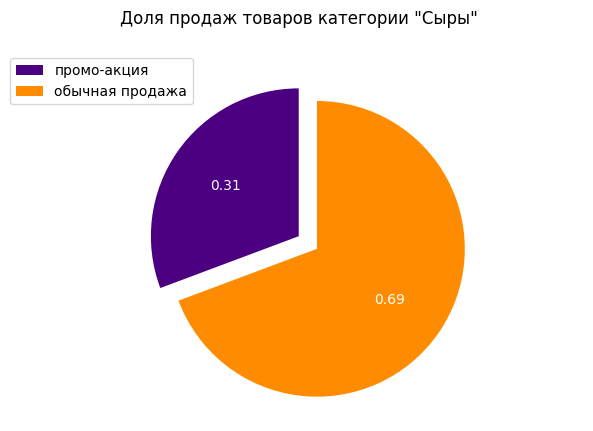

In [ ]:
colors = ['#4B0082', '#FF8C00']
plt.pie(
    df_cheese_grouped['part'],
    labels=df_cheese_grouped['is_promo'],
    autopct=lambda x: f'{x/100:.2f}',
    colors=colors,
    explode=[0, 0.15],
    textprops={'color': 'white'},
    startangle=90
)
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1))
plt.title('Доля продаж товаров категории "Сыры"', pad=20);

## Посчитать маржу по категориям

In [171]:
df['cost'] = df['revenue'] - (df['quantity'] * df['cost_price'])
df['margin_%'] = ((df['revenue'] - (df['quantity'] * df['cost_price'])) / (df['quantity'] * df['price']) * 100).round(2)
df['margin_rub'] = (df['revenue'] - (df['quantity'] * df['cost_price']))
df.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,dt,revenue,is_promo,margin,margin_%,margin_rub,cost
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,1,56.21,56.21,95,95


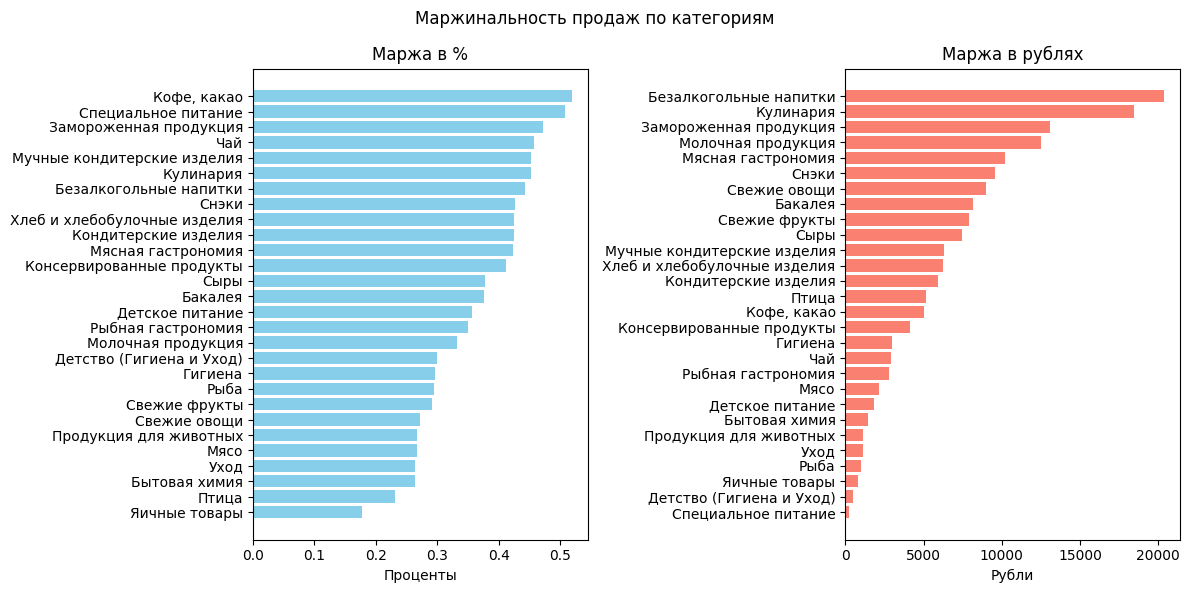

In [174]:
df_margin_perc = df.groupby('level1').agg(
    revenue = ('revenue', 'sum'),
    cost = ('cost', 'sum')
).reset_index()
df_margin_perc['margin'] = df_margin_perc['cost'] / df_margin_perc['revenue']
df_margin_rub = df.groupby('level1').agg(margin=('margin_rub', 'sum')).reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_sorted_perc = df_margin_perc.sort_values(by='margin')
df_sorted_rub = df_margin_rub.sort_values(by='margin')
ax1.barh(df_sorted_perc['level1'], df_sorted_perc['margin'], color='skyblue')
ax2.barh(df_sorted_rub['level1'], df_sorted_rub['margin'], color='salmon')
ax1.set_xlabel('Проценты')
ax1.set_title('Маржа в %')
ax2.set_xlabel('Рубли')
ax2.set_title('Маржа в рублях')
fig.suptitle('Маржинальность продаж по категориям')
plt.tight_layout();

## ABC анализ

In [ ]:
df_abc = df.groupby('level2').agg(
    quantity=('quantity', 'sum'),
    revenue=('revenue', 'sum')
).reset_index()
df_abc.head(1)

,level2,quantity,revenue
0,"Бананы, косточковые и прочие плоды",76,10191


In [ ]:
total_quantity = df_abc['quantity'].sum()
total_revenue = df_abc['revenue'].sum()
df_abc['part_quantity'] = df_abc['quantity'] / total_quantity
df_abc['part_revenue'] = df_abc['revenue'] / total_revenue
df_abc['cumsum_quantity'] = df_abc.sort_values(by='quantity', ascending=False)['part_quantity'].cumsum()
df_abc['cumsum_revenue'] = df_abc.sort_values(by='revenue', ascending=False)['part_revenue'].cumsum()
df_abc['abc_quantity'] = np.where(df_abc['cumsum_quantity'] < 0.8, 'A', np.where(df_abc['cumsum_quantity'] < 0.95, 'B', 'C'))
df_abc['abc_revenue'] = np.where(df_abc['cumsum_revenue'] < 0.8, 'A', np.where(df_abc['cumsum_revenue'] < 0.95, 'B', 'C'))
df_abc['abc'] = df_abc['abc_quantity'] + df_abc['abc_revenue']
df_abc.sort_values(by='quantity', ascending=False).head(5)

,level2,quantity,revenue,abc_quantity,abc_revenue,part_quantity,cumsum_quantity,cumsum_revenue,part_revenue,abc
51,Напитки,252,24123,A,A,0.067524,0.067524,0.144312,0.053990,AA
10,Готовые блюда,248,40356,A,A,0.066452,0.133976,0.090322,0.090322,AA
92,Хлеб и хлебобулочные изделия,218,14724,A,A,0.058414,0.192390,0.445747,0.032954,AA
72,Снэки соленые,180,17293,A,A,0.048232,0.240622,0.274058,0.038704,AA
6,Воды питьевые,162,9141,A,A,0.043408,0.284030,0.588058,0.020459,AA


In [ ]:
df_abc[['level2', 'quantity', 'revenue', 'abc']]

,level2,quantity,revenue,abc
0,"Бананы, косточковые и прочие плоды",76,10191,AA
1,Бараночные и сухарные изделия,8,460,CC
2,Бритье,3,731,CC
3,Бумажная продукция,42,4569,AA
4,Влажные салфетки,2,255,CC
5,Воды минеральные,38,2949,AB
6,Воды питьевые,162,9141,AA
7,Восточные сладости,3,702,CC
8,Все для суши,9,1591,CB
9,Готовая еда Самокат,2,484,CC
